## Do Not change the following cell, just run it

In [1]:
## From stackoverflow: https://stackoverflow.com/questions/12544056/how-do-i-get-the-current-ipython-jupyter-notebook-name/52187331#

from notebook import notebookapp
import urllib
import json
import os
import ipykernel

def notebook_path():
    """Returns the absolute path of the Notebook or None if it cannot be determined
    NOTE: works only when the security is token-based or there is also no password
    """
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[1].split('.')[0]

    for srv in notebookapp.list_running_servers():
        try:
            if srv['token']=='' and not srv['password']:  # No token and no password, ahem...
                req = urllib.request.urlopen(srv['url']+'api/sessions')
            else:
                req = urllib.request.urlopen(srv['url']+'api/sessions?token='+srv['token'])
            sessions = json.load(req)
            for sess in sessions:
                if sess['kernel']['id'] == kernel_id:
                    return os.path.join(srv['notebook_dir'],sess['notebook']['path'])
        except:
            pass  # There may be stale entries in the runtime directory 
    return None

import sys, os, os.path as osp
sys.path += [osp.dirname(osp.dirname(osp.realpath(notebook_path()))), osp.dirname(osp.realpath(notebook_path()))]

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 400


/var/folders/k1/zf0rv7y54_q54zt_vm6nfm040000gn/T/ipykernel_9006/3758627911.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
from pathlib import Path
sys.path += [str(Path(__file__ if '__file__' in dir() else ".")
                 .resolve().parent.parent)]


In [4]:
import numpy as np
import pandas as pd

## From now on, use the notebook :-)

In [5]:
# !%matplotlib qt
import os
from pathlib import Path
import sys
import glob
import numpy as np
import mne
import pyxdf
import re
from datetime import datetime, timezone
import pickle
from sklearn.preprocessing import LabelEncoder
import offline.utils as utils
from offline.utils import load_xdf_data

sys.path += [str(Path(__file__ if '__file__' in dir() else ".")
                 .resolve().parent)]

In [284]:
import importlib
importlib.reload(utils)
from offline.utils import load_xdf_data


In [121]:
exp_durations = {
    "highlight_length": 0.1,
    "target_length": 2.5,
    "baseline_length": 2,
    "delay_baseline_arrows": 0.1,
    "inter_highlight_length": 0.075,
    "inter_block_length": 3,
    "inter_trial_length": 0.1,
    "num_highlights": 30,
    "target_color": [
        0,
        0,
        255
    ],
    "highlight_color": [
        0,
        255,
        0
    ]
}

In [257]:
datadir = '/Users/mariyana.cholakova/Documents/mnse/sem4/bspm/git_repo/biosignal_stars/data'

In [135]:
file = '/Users/mariyana.cholakova/Documents/mnse/sem4/bspm/git_repo/biosignal_stars/data/raw/sub-Majd_ses-15-07-2022-short-bg_task-Default_run-002_eeg_old1.xdf'

In [296]:
file = '/Users/mariyana.cholakova/Downloads/sub-Majd_ses-15-07-2022-short-bg_task-Default_run-010_eeg.xdf'

In [297]:
raw, event_arr, event_id = load_xdf_data(file=file)

Stream 2: Calculated effective sampling rate -22.0976 Hz is different from specified rate 128.0000 Hz.


openvibesignal --> data stream
p300_markers --> marker stream
Creating RawArray with float64 data, n_channels=14, n_times=32768
    Range : 0 ... 32767 =      0.000 ...   255.992 secs
Ready.


In [300]:
# event_arr

In [228]:

# Implement the band-pass filter
flow, fhigh = 0.1, 10
raw_filt = raw.filter(flow, fhigh)

# Apply Common Average Referencing.
raw_car, _ = mne.set_eeg_reference(raw_filt, 'average', copy=True, ch_type='eeg')

# Now we want to epoch our data to trials and do a baseline correction.
total_trial_duration = exp_durations['baseline_length'] + exp_durations['target_length'] + \
                       exp_durations['highlight_length'] * exp_durations['num_highlights'] + \
                       exp_durations['inter_highlight_length'] * (exp_durations['num_highlights'] - 1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 4225 samples (33.008 sec)

Applying average reference.
Applying a custom ('EEG',) reference.


In [195]:
# event_arr[:, 0] -= 9287149 #232052412

In [229]:
raw_car.to_data_frame()

,time,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0,-2.436147e-08,8.932537e-08,2.030122e-07,-1.380483e-07,-1.380483e-07,8.932537e-08,-1.380483e-07,2.030122e-07,-1.380483e-07,8.932537e-08,8.932537e-08,-1.380483e-07,-1.380483e-07,8.932537e-08
1,8,1.573812e+06,4.979042e+06,5.654683e+05,-1.910107e+06,4.427542e+06,2.767601e+06,3.282686e+06,-8.007619e+05,-6.978115e+05,-4.108547e+05,1.822661e+06,-4.014777e+06,-5.761360e+06,-5.823141e+06
2,16,3.274794e+06,9.683201e+06,1.437408e+06,-3.365549e+06,8.334366e+06,5.269937e+06,6.251580e+06,-1.599727e+06,-1.497507e+06,-9.649785e+05,3.235571e+06,-7.854899e+06,-1.087054e+07,-1.133366e+07
3,23,5.193918e+06,1.385890e+07,2.843558e+06,-4.018522e+06,1.127735e+07,7.292894e+06,8.627176e+06,-2.401595e+06,-2.496912e+06,-1.787609e+06,3.929761e+06,-1.129797e+07,-1.479326e+07,-1.622769e+07
4,31,7.359301e+06,1.729598e+07,4.873167e+06,-3.708570e+06,1.295547e+07,8.712690e+06,1.019414e+07,-3.223190e+06,-3.785352e+06,-2.970795e+06,3.773286e+06,-1.404566e+07,-1.720870e+07,-2.022176e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,259961,2.602875e+06,-3.116517e+05,1.384191e+07,2.070794e+06,-9.511421e+05,-1.166624e+07,-1.154081e+07,-2.638000e+06,-5.061792e+06,-9.230915e+05,2.286362e+06,4.014804e+06,1.040992e+07,-2.133942e+06
33276,259969,2.904751e+06,-5.155723e+05,1.144946e+07,2.515665e+06,4.314276e+05,-1.021858e+07,-8.637827e+06,-3.472904e+06,-5.020831e+06,-1.387169e+06,2.235570e+06,2.723011e+06,8.759374e+06,-1.766369e+06
33277,259977,2.450540e+06,-5.189643e+05,8.197587e+06,2.203597e+06,9.417557e+05,-7.609260e+06,-5.717456e+06,-3.141144e+06,-4.022167e+06,-1.305920e+06,1.781809e+06,1.650760e+06,6.354203e+06,-1.265340e+06
33278,259984,1.392582e+06,-3.213420e+05,4.280162e+06,1.274643e+06,6.911922e+05,-4.065056e+06,-2.838951e+06,-1.843363e+06,-2.233738e+06,-7.781813e+05,9.879616e+05,7.699416e+05,3.344894e+06,-6.607451e+05


In [148]:
event_id

{'baseline_for_trial': 0,
 'block_end': 1,
 'highlight_down': 2,
 'highlight_left': 3,
 'highlight_right': 4,
 'highlight_up': 5,
 'pause': 6,
 'target_down': 7,
 'target_left': 8,
 'target_right': 9,
 'target_up': 10,
 'trial_begin': 11}

In [230]:
new_event_id, new_event_arr = utils.modify_events(event_arr=event_arr, event_id=event_id)

In [153]:
from global_configs import globals as GLOB

In [239]:
epochs_highlights_notargets = mne.Epochs(raw_car,
                                         events=new_event_arr,
                                         event_id={GLOB.HIGHLIGHT_TARGET_FALSE: 99},
                                         tmin=0,
                                         tmax=.65,
                                         baseline=None,
                                         preload=True)

epochs_highlights_targets = mne.Epochs(raw_car,
                                       events=new_event_arr,
                                       event_id={GLOB.HIGHLIGHT_TARGET_TRUE: 100},
                                       tmin=0,
                                       tmax=.65,
                                       baseline=None,
                                       preload=True)

Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 182 events and 84 original time points ...
0 bad epochs dropped
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 58 events and 84 original time points ...
0 bad epochs dropped


In [197]:
new_event_arr

array([[    0,     0,     0],
       [  269,     0,    11],
       [  269,     0,    10],
       [  590,     0,    99],
       [  609,     0,   100],
       [  629,     0,    99],
       [  648,     0,    99],
       [  668,     0,    99],
       [  687,     0,   100],
       [  707,     0,    99],
       [  726,     0,    99],
       [  746,     0,   100],
       [  765,     0,    99],
       [  785,     0,    99],
       [  804,     0,   100],
       [  824,     0,    99],
       [  843,     0,    99],
       [  863,     0,    99],
       [  882,     0,     6],
       [  940,     0,     0],
       [ 1209,     0,    11],
       [ 1209,     0,     7],
       [ 1529,     0,    99],
       [ 1549,     0,    99],
       [ 1568,     0,   100],
       [ 1588,     0,    99],
       [ 1607,     0,    99],
       [ 1627,     0,    99],
       [ 1646,     0,   100],
       [ 1666,     0,    99],
       [ 1685,     0,    99],
       [ 1705,     0,   100],
       [ 1724,     0,    99],
       [ 1

In [155]:
raw_car.ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

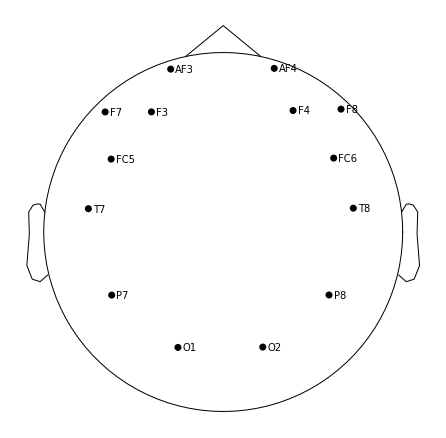

In [156]:

fig= raw_car.plot_sensors(ch_type='eeg', show_names=True,
                             title='Available Channels', show=True )

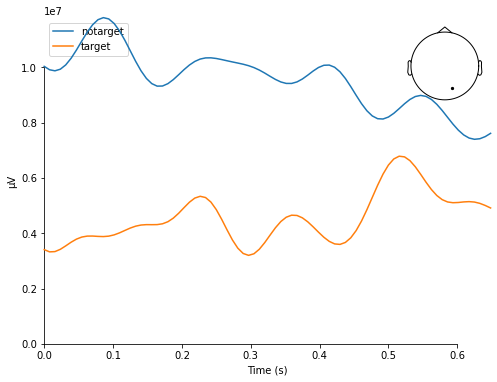

[<Figure size 576x432 with 2 Axes>]

In [301]:
ch = 'O2'#'P7'
# average the signals for channel Cz for both conditions:
avg_nt = epochs_highlights_notargets[:60].average(picks=ch)
avg_t = epochs_highlights_targets.average(picks=ch)

# Plot the evoked potentials
evokeds = dict(notarget=avg_nt, target=avg_t)
picks = [f'eeg{n}' for n in range(10, 15)]
mne.viz.plot_compare_evokeds(evokeds)

In [272]:
epochs_highlights_notargets.to_data_frame()['time'][20:50].values/1000

array([0.156, 0.164, 0.172, 0.18 , 0.188, 0.195, 0.203, 0.211, 0.219,
       0.227, 0.234, 0.242, 0.25 , 0.258, 0.266, 0.273, 0.281, 0.289,
       0.297, 0.305, 0.312, 0.32 , 0.328, 0.336, 0.344, 0.352, 0.359,
       0.367, 0.375, 0.383])

In [277]:

# Save the evoked signals
epochs_highlights_notargets.average().save(datadir + '/avg_nt.fif', 
        overwrite=True);
epochs_highlights_targets.average().save(datadir + '/avg_t.fif', 
        overwrite=True);

f=datadir + '/avg_nt.fif'
# fig, axes = plt.subplots(ncols=3, figsize=(8, 8))
evoked_nt =  mne.Evoked(f)
f2=datadir + '/avg_t.fif'
evoked_t = mne.Evoked(f2)

    Found the data of interest:
        t =       0.00 ...     648.44 ms (highlight_target_false)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =       0.00 ...     648.44 ms (highlight_target_true)
        0 CTF compensation matrices available
        nave = 58 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/k1/zf0rv7y54_q54zt_vm6nfm040000gn/T/ipykernel_9006/2229563707.py:8: RuntimeWarning:

More than 25 topomaps plots requested. This might take a while.



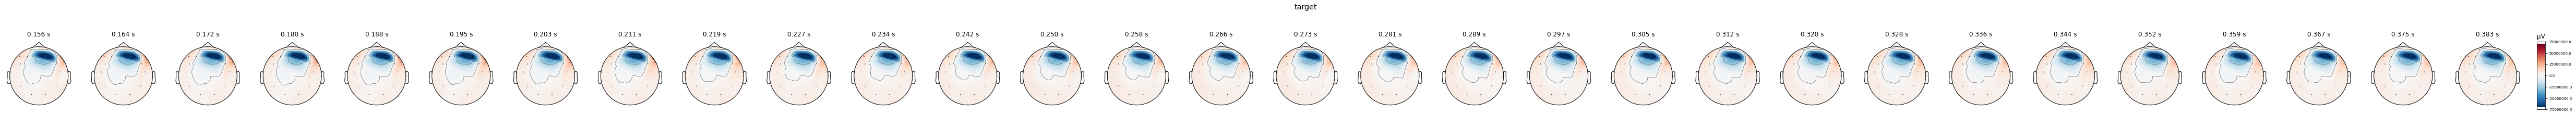

In [281]:
times = [ .281, .305,  .312]
times = [.266, 0.273, 0.281, 0.289,
       0.297, 0.305, 0.312, 0.32 , 0.328, 0.336,]
times = [0.156, 0.164, 0.172, 0.18 , 0.188, 0.195, 0.203, 0.211, 0.219,
       0.227, 0.234, 0.242, 0.25 , 0.258, 0.266, 0.273, 0.281, 0.289,
       0.297, 0.305, 0.312, 0.32 , 0.328, 0.336, 0.344, 0.352, 0.359,
       0.367, 0.375, 0.383]
d = evoked_t.plot_topomap(times, ch_type='eeg', time_unit='s', title='target',
                        # axes=axes[0:]
                         size=1.5,
                        # show_names=True,
                        res=256

                        )

/var/folders/k1/zf0rv7y54_q54zt_vm6nfm040000gn/T/ipykernel_9006/3737603719.py:1: RuntimeWarning:

More than 25 topomaps plots requested. This might take a while.



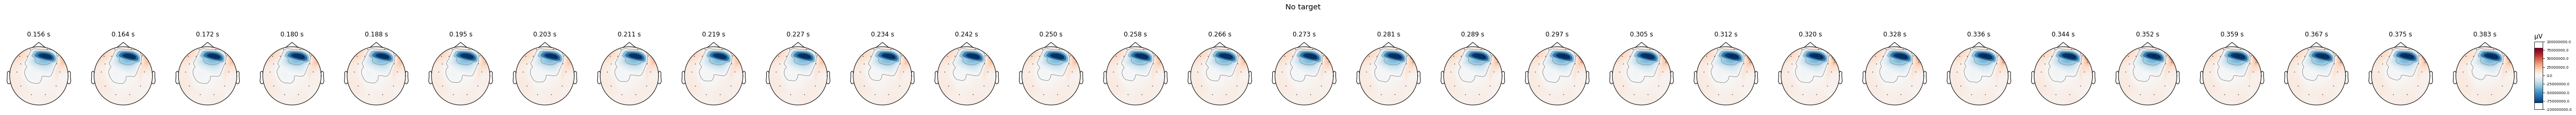

In [282]:

d2 = evoked_nt.plot_topomap(times, ch_type='eeg', time_unit='s',  title='No target ',
                        #  axes=axes[:]
                         size=1.5
)

Opening raw-browser...


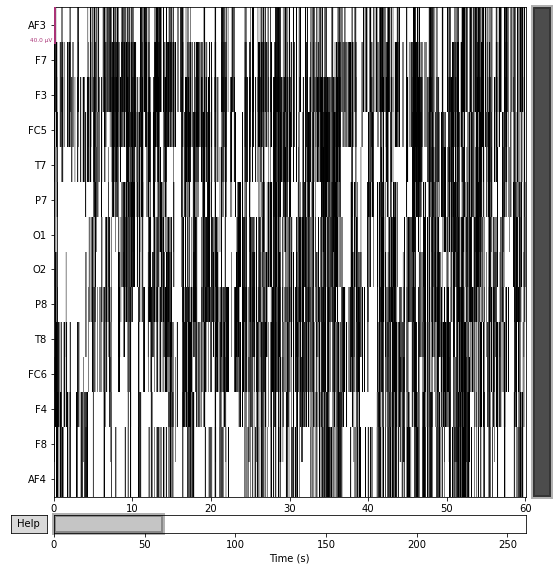

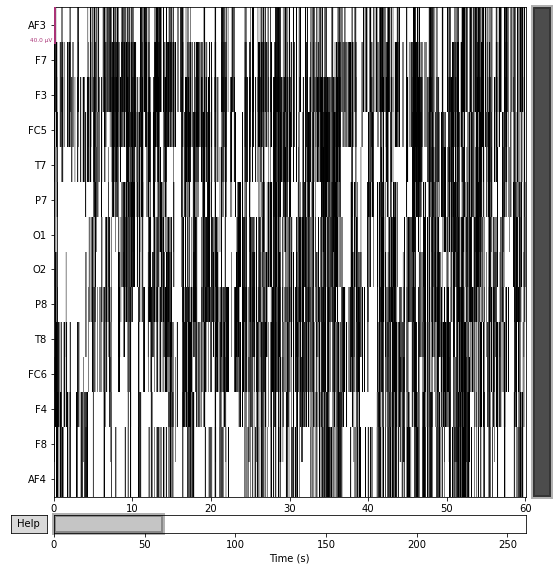

In [283]:
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names),
         remove_dc=False)

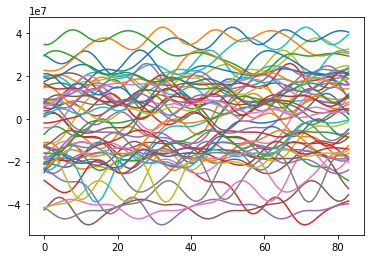

In [219]:
import matplotlib.pyplot as plt
plt.figure()
df_epochs_t = epochs_highlights_targets.to_data_frame()
df_epochs_nt = epochs_highlights_notargets.to_data_frame()
epochs_plot = df_epochs_nt['epoch'].unique()[:58]
for ep in epochs_plot:
    v = df_epochs_nt.loc[(df_epochs_nt['epoch'].isin([ep]))][ch].values
    plt.plot(v)

In [146]:
tmin, tmax = -exp_durations['baseline_length'], total_trial_duration
epochs = mne.Epochs(raw_car,
                              events=event_arr,
                              event_id=event_id,
                              tmin=tmin,
                              tmax=tmax,
                              baseline=(-exp_durations['baseline_length'], 0),
                              # We apply baseline correction here !!!!!!!!!!!!!
                              preload=True,
                              event_repeated='drop')


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1495 original time points ...
1 bad epochs dropped


In [147]:
epochs_resampled = epochs.resample(64)

TypeError: resample() got an unexpected keyword argument 'copy'

TRIAL NO  /Users/mariyana.cholakova/Documents/mnse/sem4/bspm/git_repo/biosignal_stars/data/raw/sub-P001_ses-S001_task-Default_run-001_eeg.xdf
p300_markers --> marker stream
emotiv-replay --> data stream
Creating RawArray with float64 data, n_channels=14, n_times=41694
    Range : 0 ... 41693 =      0.000 ...   325.727 secs
Ready.
data loaded
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 4225 samples (33.008 sec)

Applying average reference.
Applying a custom ('EEG',) reference.
Multiple event values fo

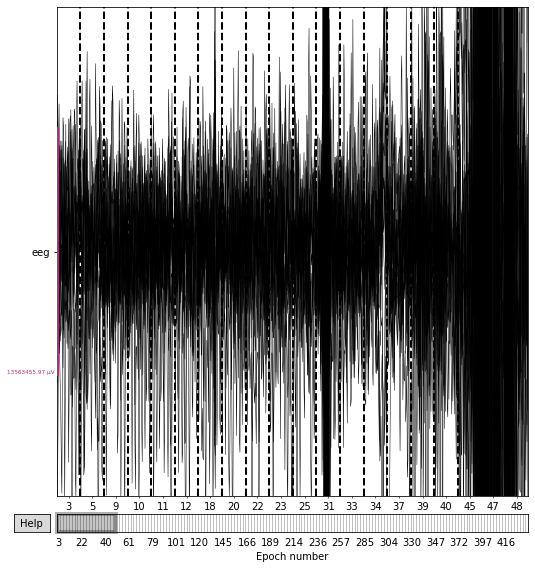

    Using multitaper spectrum estimation with 7 DPSS windows


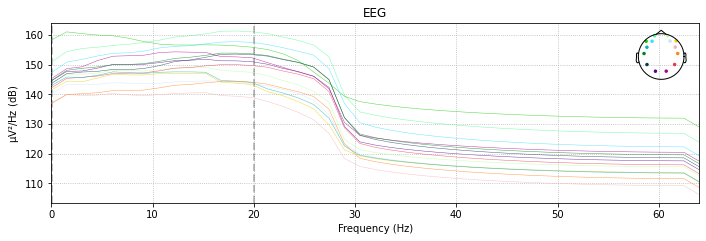

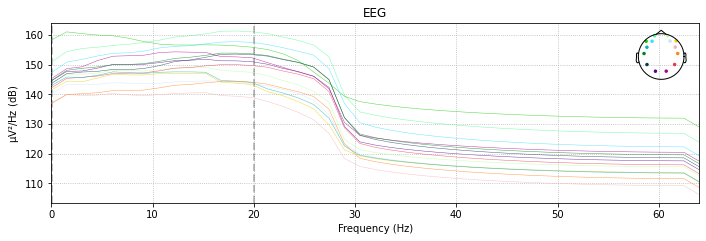

In [118]:
file = '/Users/mariyana.cholakova/Documents/mnse/sem4/bspm/git_repo/biosignal_stars/data/raw/*_eeg.xdf'

epochs_list = []
for trial_no, trial in enumerate(sorted(glob.glob(file))):
    print("TRIAL NO ", trial)
    raw, event_arr, event_id = load_xdf_data(file=trial)
    print('data loaded')

    # Implement the band-pass filter
    flow, fhigh = 0.1, 20
    raw_filt = raw.filter(flow, fhigh)

    # Apply Common Average Referencing.
    raw_car, _ = mne.set_eeg_reference(raw_filt, 'average', copy=True, ch_type='eeg')

    # Now we want to epoch our data to trials and do a baseline correction.
    total_trial_duration = exp_durations['baseline_length'] + exp_durations['target_length'] + \
                           exp_durations['highlight_length'] * exp_durations['num_highlights'] + \
                           exp_durations['inter_highlight_length'] * (exp_durations['num_highlights'] - 1)
#     tmin, tmax = -exp_durations['baseline_length'], total_trial_duration
#     epochs_list.append(mne.Epochs(raw_car,
#                                   events=event_arr,
#                                   event_id=event_id,
#                                   tmin=tmin,
#                                   tmax=tmax,
#                                   baseline=(-exp_durations['baseline_length'], 0),
#                                   # We apply baseline correction here !!!!!!!!!!!!!
#                                   preload=True,
#                                   event_repeated='drop'))
# Concatenate the epochs
# epochs = mne.concatenate_epochs(epochs_list)

# Get a subselection of epochs that resembles the trials
sub_epochs_trials = epochs['trial_begin']

# Now we epoch the trials to get highlights
tmin, tmax = 0, .65 #exp_durations['highlight_length']
epochs_highlights = mne.Epochs(raw_car,
                               events=event_arr,
                               event_id=event_id,
                               tmin=tmin,
                               tmax=tmax,
                               baseline=None,  # we don't apply baseline correction here !!!!!!!!!!!!!
                               preload=True,
                               event_repeated='drop')

# Get the two classes of epochs that involves the P300 response and not
sub_epochs = epochs_highlights['highlight_down', 'highlight_up']

# After this we should exclude bad epochs. Click on the epochs in the window to drop them. Close the window to save.
sub_epochs.plot(scalings='auto', butterfly=True)

# We can also check epochs with the PSD.
sub_epochs.plot_psd()

# # %%
# with open(r'C:\Users\AYCA\PycharmProjects\biosignal_stars\data\sub_epochs_trial.pkl', 'wb') as file:
#     # Save the sub-epochs for signal processing
#     pickle.dump(sub_epochs, file)

Opening epochs-browser...


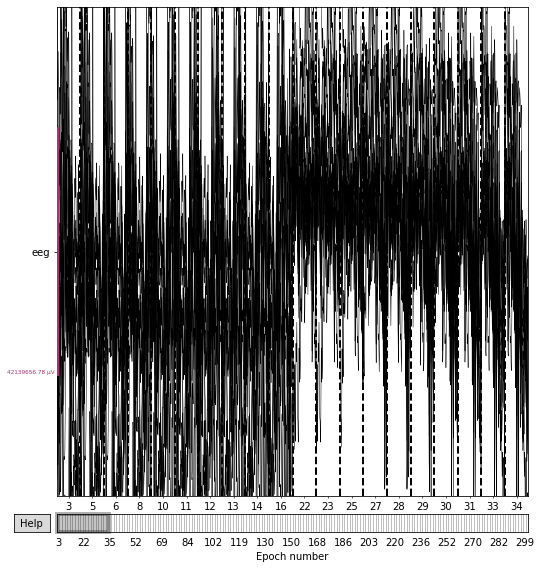

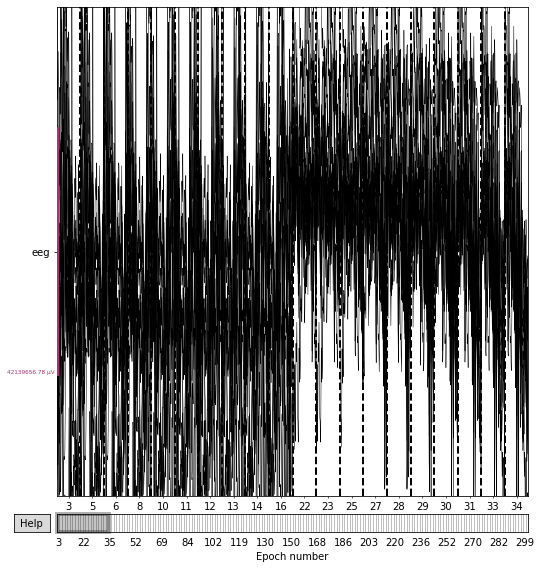

In [237]:
epochs_highlights_notargets.plot(scalings='auto', butterfly=True)
# 